In [38]:
# Read one image
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# cv2 reads an image in BGR Format
im2 = cv2.imread('C:/Users/prach/Documents/GitHub/Data-Science-Live-Master-Course-With-Python/Projects/Extracting Dominant Colors/image2.jpeg')
# convert from BGR to RGB
# im2 = cv2.cvtColor(im2,cv2.COLOR_BGR2RGB)
# original_shape = im2.shape
# print(im.shape)

In [40]:
im2.shape

(167, 302, 3)

In [41]:
im2 = cv2.cvtColor(im2,cv2.COLOR_BGR2RGB)
original_shape = im2.shape
print(im2.shape)

(167, 302, 3)


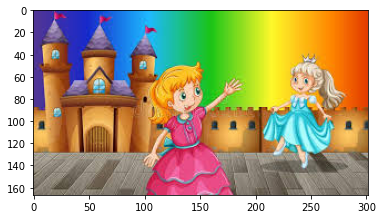

In [42]:
# show image as RGB format
plt.imshow(im2)
plt.show()

In [44]:
# We want to flatten each channel of image
all_pixels = im2.reshape((-1,3))
print(all_pixels.shape)
# we got 3 linear array for each color i.e. for red blue and green 

(50434, 3)


In [45]:
from sklearn.cluster import KMeans

In [57]:
dominant_colors  = 15;
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(n_clusters=15)

In [58]:
centers = km.cluster_centers_
# RBG values 
centers

array([[183.98946942, 116.72559741,  49.95868773],
       [148.17623405, 139.09400998, 132.72046589],
       [ 27.02350917, 136.13761468, 236.00114679],
       [228.79715219, 168.30835668,  83.62861811],
       [ 36.91860465, 187.98992248, 185.36162791],
       [243.59353939, 220.73646293,  33.13548687],
       [ 52.91567193,  50.33230651, 174.61840585],
       [223.79252835,  66.78285524, 122.85223482],
       [143.25194805, 229.61645022, 239.06147186],
       [ 41.26686657, 197.95764618,  45.73988006],
       [106.62457025,  96.40683016,  91.2477653 ],
       [241.63031652, 109.49975272,   3.75173096],
       [234.33600427, 200.76709402, 177.89369658],
       [129.5241801 ,  61.37604225,  25.19927738],
       [144.00577478, 221.71703561,  34.02598653]])

In [59]:
centers = np.array(centers , dtype = 'uint8')
centers
# these are the RGB values for a particular dominnat color

array([[183, 116,  49],
       [148, 139, 132],
       [ 27, 136, 236],
       [228, 168,  83],
       [ 36, 187, 185],
       [243, 220,  33],
       [ 52,  50, 174],
       [223,  66, 122],
       [143, 229, 239],
       [ 41, 197,  45],
       [106,  96,  91],
       [241, 109,   3],
       [234, 200, 177],
       [129,  61,  25],
       [144, 221,  34]], dtype=uint8)

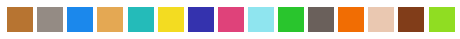

In [61]:
# I am going to plot 6 boxes each having differnt color
# Subplotting
i = 1
# ye just size a ak box ka ki kitna chahiye
# you can skip this also
plt.figure(0,figsize=(8,2))

colors = []

for each_col in centers :
    # here 1 row having 6 columns and we are in ith box 
    plt.subplot(1,15,i)
    plt.axis("off")
    i = i + 1
    
    colors.append(each_col)
    
    # Color Swatch
    a = np.zeros((100,100,3) , dtype = 'uint8')
    a[:,:,:] = each_col
    plt.imshow(a)
plt.show()
# Here we have extracted the most dominant colors   

In [62]:
colors

[array([183, 116,  49], dtype=uint8),
 array([148, 139, 132], dtype=uint8),
 array([ 27, 136, 236], dtype=uint8),
 array([228, 168,  83], dtype=uint8),
 array([ 36, 187, 185], dtype=uint8),
 array([243, 220,  33], dtype=uint8),
 array([ 52,  50, 174], dtype=uint8),
 array([223,  66, 122], dtype=uint8),
 array([143, 229, 239], dtype=uint8),
 array([ 41, 197,  45], dtype=uint8),
 array([106,  96,  91], dtype=uint8),
 array([241, 109,   3], dtype=uint8),
 array([234, 200, 177], dtype=uint8),
 array([129,  61,  25], dtype=uint8),
 array([144, 221,  34], dtype=uint8)]

In [63]:
# Make a new iamge with same shape as original
new_img = np.zeros((50434, 3) , dtype = 'uint8')
print(new_img.shape)

(50434, 3)


In [64]:
km.labels_

array([ 6,  6,  6, ..., 10,  1, 10])

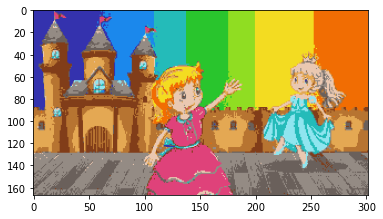

In [65]:
# we will iterate over every pixel and will check what is the closest center to this pixel 
for ix in range(new_img.shape[0]) :
    # color put kar rahe h hum isme according to color dominant
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()